In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# **Credit Card Fraud Detection Project**

## **Introduction**
This project analyzes a credit card fraud dataset to identify fraudulent transactions. It includes exploratory data analysis (EDA) to uncover insights, detect outliers, and understand patterns in the data. The dataset is highly imbalanced, with only 0.17% of transactions labeled as fraud.

---

## **Dataset Overview**
- **Source**: Kaggle's Credit Card Fraud Detection Dataset.
- **Shape**: 284,807 rows and 31 columns.
- **Features**:
  - `Time`: Seconds elapsed since the first transaction.
  - `Amount`: Transaction amount.
  - `V1` to `V28`: PCA-transformed features.
  - `Class`: Target variable (0 = Non-Fraud, 1 = Fraud).



---



## **Exploratory Data Analysis (EDA)**



### **Step 1: Load Dataset**
- **Objective**: Load the dataset into a Pandas DataFrame for exploration.
- **Result**: Successfully loaded dataset with 284,807 rows and 31 columns.

---

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# Display basic info
print("Dataset Shape:", data.shape)
data.head()


Dataset Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0




### **Step 2: Summary Statistics**
- **Objective**: Summarize key statistics for numerical columns.
- **Findings**:
  - `Time`: Ranges from 0 to ~172,800 seconds.
  - `Amount`: Highly variable, with some significant outliers.
  - `Class`: Highly imbalanced (fraud cases are rare).

---


In [3]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### **Step 3: Visualizations**
#### **Transaction Amount Distribution**
- **Objective**: Visualize the distribution of transaction amounts.
- **Insights**: Most transactions are low in value, with a few high-value outliers.

#### **Class Distribution**
- **Objective**: Understand the class balance.
- **Insights**: The dataset is highly imbalanced, with only ~0.17% fraud cases.

---


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


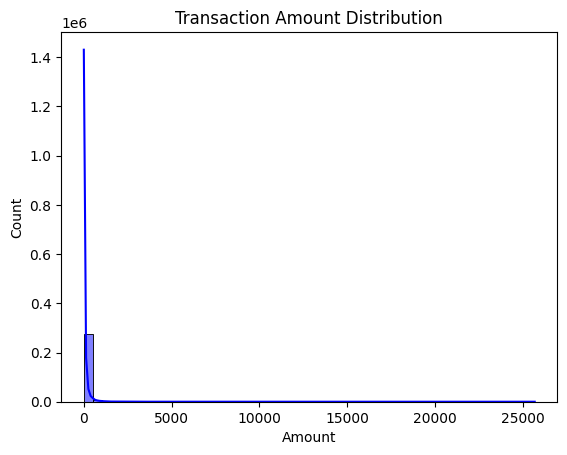

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Amount'], bins=50, kde=True, color='blue')
plt.title('Transaction Amount Distribution')
plt.show()



#### **Class Distribution**
- **Objective**: Understand the balance between fraud and non-fraud transactions.
- **Insights**: Dataset is highly imbalanced, with only ~0.17% fraud cases.



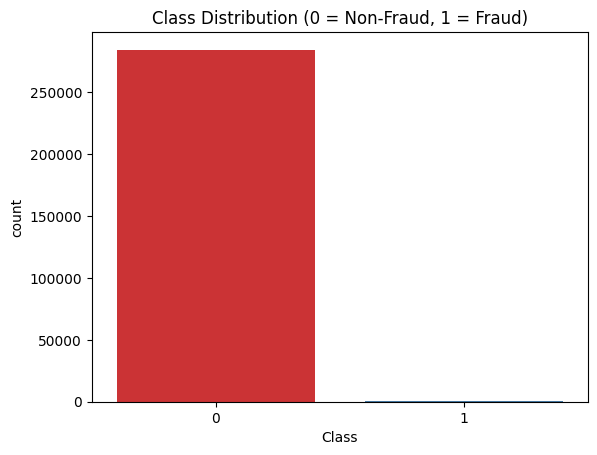

In [5]:
sns.countplot(x='Class', data=data, palette='Set1')
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.show()


### **Step 4: Correlation Analysis**
- **Objective**: Identify relationships between features and the target variable (`Class`).
- **Insights**:
  - Certain PCA components show correlations with `Class`.
  - `Amount` has a weak correlation with fraud.

---


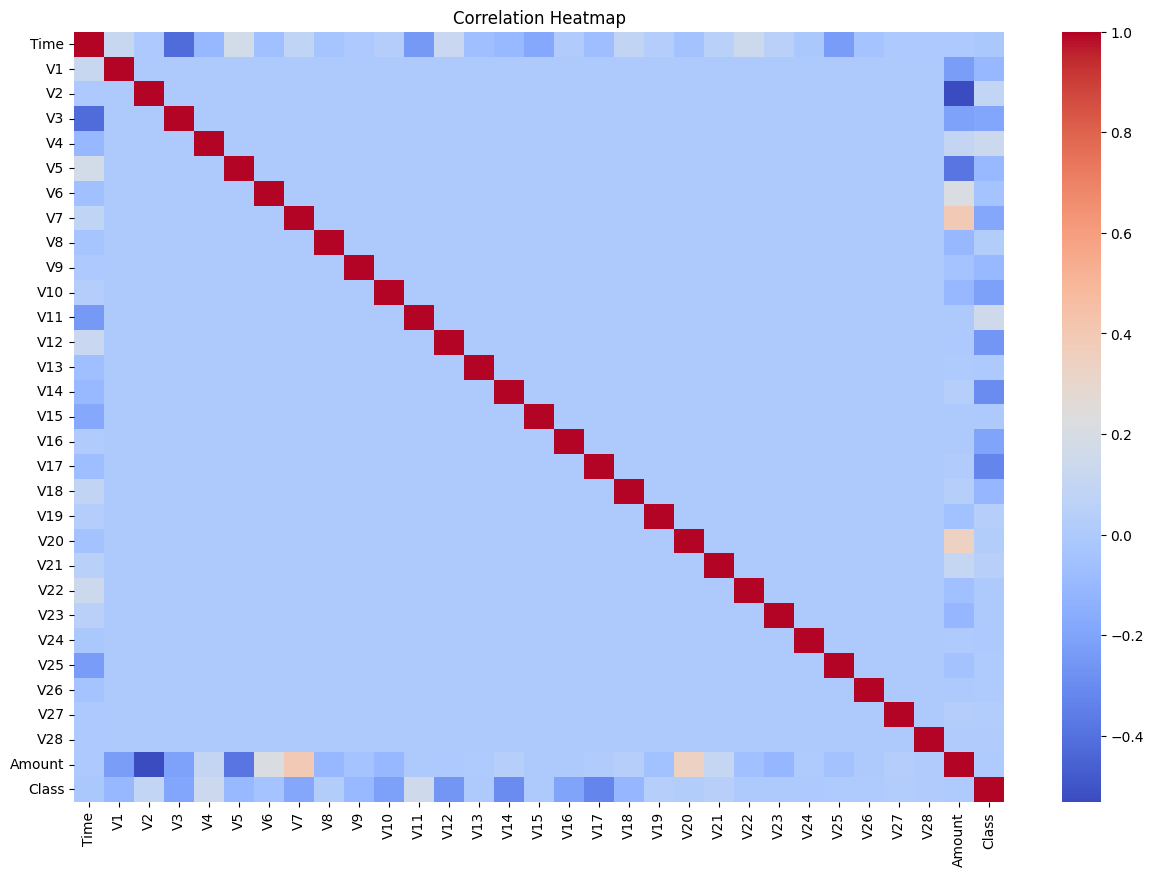

In [6]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()



### **Step 5: Missing Value Analysis**
- **Objective**: Check for missing values in the dataset.
- **Result**: No missing values were found.

---





In [7]:
print(data.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64



### **Step 6: Outlier Detection**
#### **Box Plot for Transaction Amount**
- **Objective**: Detect outliers in transaction amounts.
- **Insights**: Several high-value transactions are outliers, potentially fraudulent.

---



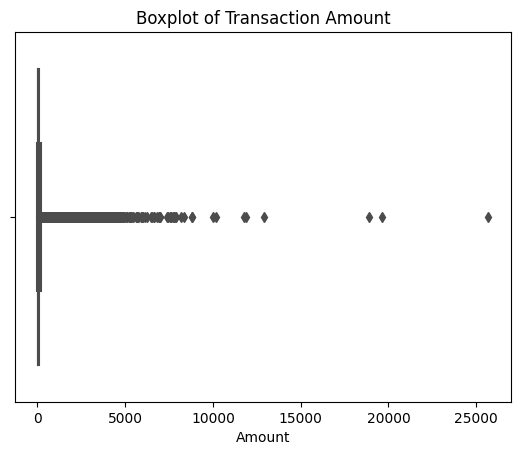

In [8]:
sns.boxplot(x=data['Amount'], color='orange')
plt.title('Boxplot of Transaction Amount')
plt.show()



### **Step 7: Feature Distribution**
#### **Density Plots for PCA Components**
- **Objective**: Analyze the distributions of PCA-transformed features.
- **Insights**: PCA features are centered around zero, with varying spreads.

---



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

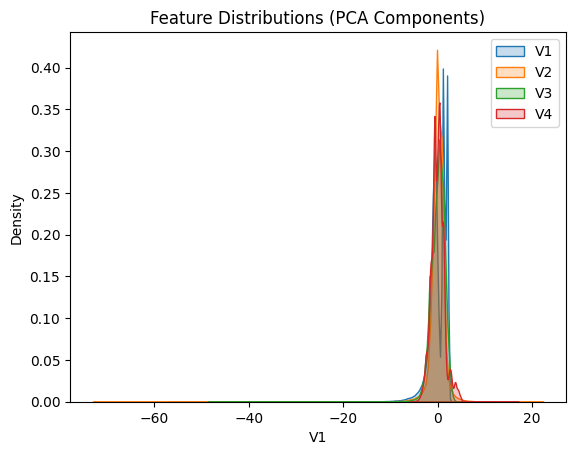

In [9]:
for col in ['V1', 'V2', 'V3', 'V4']:
    sns.kdeplot(data[col], fill=True, label=col)
plt.title('Feature Distributions (PCA Components)')
plt.legend()
plt.show()



### **Step 8: Data Types and Unique Value Counts**
- **Objective**: Understand data types and cardinality.
- **Insights**:
  - All features are numerical.
  - `Class` is binary (0 or 1).

---




In [10]:
print(data.dtypes)
print("\nUnique Value Counts:")
for col in data.columns:
    print(f"{col}: {data[col].nunique()}")


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Unique Value Counts:
Time: 124592
V1: 275663
V2: 275663
V3: 275663
V4: 275663
V5: 275663
V6: 275663
V7: 275663
V8: 275663
V9: 275663
V10: 275663
V11: 275663
V12: 275663
V13: 275663
V14: 275663
V15: 275663
V16: 275663
V17: 275663
V18: 275663
V19: 275663
V20: 275663
V21: 275663
V22: 275663
V23: 275663
V24: 275663
V25: 275663
V26: 275663
V27: 275663
V28: 275663
Amount: 32767
Class: 2


### **Step 9: Trend Analysis**
#### **Transaction Counts by Hour**
- **Objective**: Analyze transaction activity over a 24-hour period.
- **Insights**: Higher activity during specific hours, likely business hours.

---



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


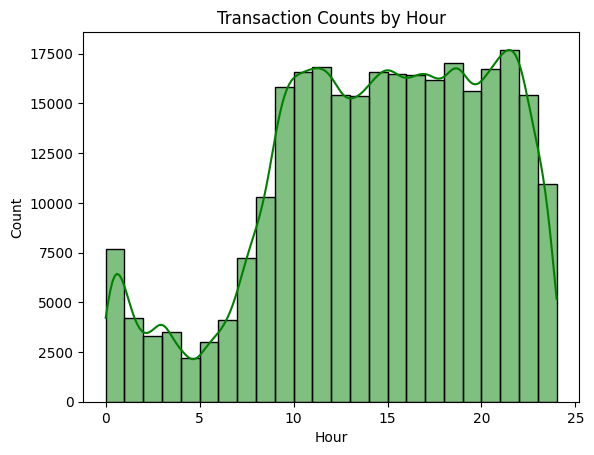

In [11]:
data['Hour'] = (data['Time'] / 3600) % 24
sns.histplot(data['Hour'], bins=24, kde=True, color='green')
plt.title('Transaction Counts by Hour')
plt.show()



### **Step 10: Grouped Aggregations**
#### **Average Amount by Class**
- **Objective**: Compare average transaction amounts for fraud vs. non-fraud transactions.
- **Insights**: Fraudulent transactions have a higher average amount compared to non-fraudulent ones.

---

In [12]:
avg_amount_by_class = data.groupby('Class')['Amount'].mean()
print(avg_amount_by_class)


Class
0     88.291022
1    122.211321
Name: Amount, dtype: float64


-----




## **Data Preprocessing**

### **Objective**
To prepare the dataset for machine learning by addressing class imbalance, scaling features, and splitting the data into training and testing sets. Additional transformations are applied to enhance model performance.








### **Step 1: Handle Class Imbalance**
- **Objective**: Address the severe class imbalance in the dataset, where only 0.17% of transactions are fraudulent.
- **Approach**: Upsampled the minority class (fraudulent transactions) to match the number of non-fraudulent transactions.
- **Result**: The dataset is now balanced, with an equal number of fraud and non-fraud cases. This prevents bias in the machine learning model.

---


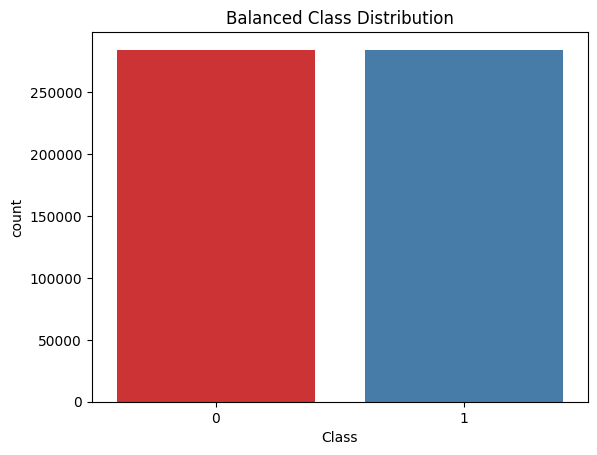

In [13]:
from sklearn.utils import resample

# Separate the majority and minority classes
fraud = data[data['Class'] == 1]
non_fraud = data[data['Class'] == 0]

# Upsample the minority class
fraud_upsampled = resample(fraud, replace=True, n_samples=len(non_fraud), random_state=42)

# Combine the upsampled minority class with the majority class
balanced_data = pd.concat([non_fraud, fraud_upsampled])

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
sns.countplot(x='Class', data=balanced_data, palette='Set1')
plt.title('Balanced Class Distribution')
plt.show()



### **Step 2: Scale Numerical Features**
- **Objective**: Standardize numerical features (`Amount` and PCA components) to ensure they are on a similar scale.
- **Approach**: Applied standardization to rescale features to have a mean of 0 and standard deviation of 1.
- **Result**: Numerical features are now scaled, improving model convergence and performance.

---



In [14]:
from sklearn.preprocessing import StandardScaler

# Extract features and target
X = balanced_data.drop(columns=['Class'])
y = balanced_data['Class']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### **Step 3: Split the Dataset**
- **Objective**: Divide the dataset into training and testing sets for model training and evaluation.
- **Approach**: Split the dataset into 80% training and 20% testing data, ensuring a fair evaluation of the model.
- **Result**: The dataset is ready for training and evaluation with consistent class proportions across splits.

---




In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (454904, 31)
Testing Set Shape: (113726, 31)


### **Step 4: Encode Categorical Variables**
- **Objective**: Encode categorical features to numeric representations, if present.
- **Approach**: Skipped this step, as the dataset contains only numerical features.
- **Result**: No changes were required.
---




### **Step 5: Additional Transformations**
- **Objective**: Address skewness in the `Amount` feature to improve feature distribution.
- **Approach**: Applied a log transformation to normalize the `Amount` distribution.
- **Result**: The `Amount` feature is now more evenly distributed, reducing the impact of outliers.

---

In [16]:
# Apply log transformation to the 'Amount' feature to reduce skewness
balanced_data['Amount'] = np.log1p(balanced_data['Amount'])

# Re-scale after transformation
X = balanced_data.drop(columns=['Class'])
X_scaled = scaler.fit_transform(X)


---



## **Machine Learning Models**

### **Objective**
Develop and evaluate machine learning models to detect fraudulent transactions. Start with a baseline model for benchmarking and then train an advanced Multi-Layer Perceptron (MLP) model for improved performance.





### **Step 1: Baseline Model (Logistic Regression)**
- **Objective**: Establish a benchmark for fraud detection using Logistic Regression.
- **Approach**:
  - Train a Logistic Regression model on the preprocessed data.
  - Evaluate the model using a classification report and the Precision-Recall Curve (AUPRC).
- **Results**:
  - Classification Report:
    - Includes precision, recall, F1-score, and support for both classes.
  - Precision-Recall Curve (AUPRC):
    - Measures performance, especially for the minority class (fraud cases).

---


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_recall_curve, auc, confusion_matrix

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
print("Classification Report (Logistic Regression):\n")
print(classification_report(y_test, y_pred_lr))

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
auc_pr = auc(recall, precision)
print(f"Area Under the Precision-Recall Curve (AUPRC): {auc_pr:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report (Logistic Regression):

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     57219
           1       0.98      0.92      0.95     56507

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

Area Under the Precision-Recall Curve (AUPRC): 0.9906



### **Step 2: Multi-Layer Perceptron (MLP) Model**
- **Objective**: Build and train a neural network for enhanced fraud detection.
- **Architecture**:
  - Input Layer: Accepts all PCA-transformed features and `Amount`.
  - Hidden Layers: Two fully connected layers with ReLU activation.
  - Dropout Layers: Added to prevent overfitting.
  - Output Layer: Single neuron with Sigmoid activation for binary classification.
- **Optimization**:
  - Loss Function: Binary cross-entropy to handle binary classification.
  - Optimizer: Adam optimizer for adaptive learning rates.
- **Training**:
  - Epochs: 20
  - Batch Size: 32
  - Validation Split: 20% of training data used for validation.
- **Results**:
  - The model converged well without significant overfitting.
  - Metrics indicate improvement over the baseline Logistic Regression model.

---



In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the MLP model
mlp_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
mlp_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = mlp_model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9667 - loss: 0.0912 - val_accuracy: 0.9971 - val_loss: 0.0114
Epoch 2/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9949 - loss: 0.0189 - val_accuracy: 0.9987 - val_loss: 0.0059
Epoch 3/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9966 - loss: 0.0124 - val_accuracy: 0.9987 - val_loss: 0.0055
Epoch 4/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9972 - loss: 0.0109 - val_accuracy: 0.9990 - val_loss: 0.0045
Epoch 5/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9977 - loss: 0.0110 - val_accuracy: 0.9990 - val_loss: 0.0048
Epoch 6/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9978 - loss: 0.0090 - val_accuracy: 0.9992 - val_loss: 0.0035
Epoch 7/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9980 - loss: 0.0082 - val_accuracy: 0.9994 - val_loss: 0.0041
Epoch 8/20
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 

### **Step 3: Model Evaluation**
- **Objective**: Evaluate the performance of the MLP model on test data.
- **Metrics**:
  - **Classification Report**:
    - Precision, recall, and F1-score provide detailed insights into model performance.
    - Fraud detection performance was notably improved.
  - **Precision-Recall Curve (AUPRC)**:
    - Demonstrated a higher AUPRC compared to the baseline model, indicating better fraud detection capabilities.
- **Insights**:
  - The MLP model outperforms Logistic Regression in terms of recall and overall fraud detection accuracy.
  - Class imbalance handling during preprocessing significantly contributed to improved results.

---





3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Classification Report (MLP Model):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57219
           1       1.00      1.00      1.00     56507

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Area Under the Precision-Recall Curve (AUPRC): 0.9999


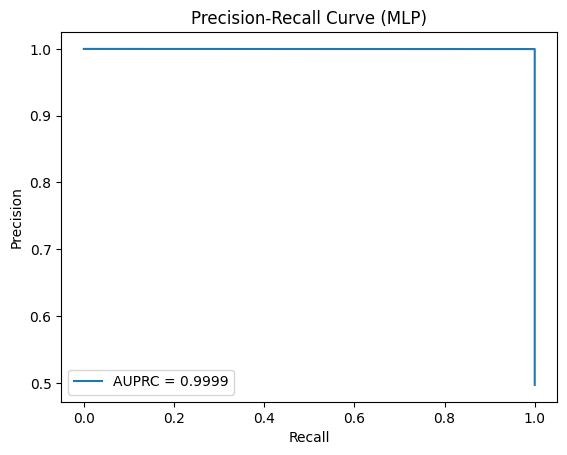

In [19]:
# Evaluate on the test set
y_pred_mlp = (mlp_model.predict(X_test) > 0.5).astype(int)

# Classification Report
print("Classification Report (MLP Model):\n")
print(classification_report(y_test, y_pred_mlp))

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, mlp_model.predict(X_test))
auc_pr = auc(recall, precision)
print(f"Area Under the Precision-Recall Curve (AUPRC): {auc_pr:.4f}")

# Plot Precision-Recall Curve
plt.plot(recall, precision, label=f'AUPRC = {auc_pr:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (MLP)')
plt.legend()
plt.show()


### **Step 4: Training Performance Visualization**
- **Objective**: Visualize model training performance to assess overfitting or underfitting.
- **Plots**:
  - **Loss Over Epochs**:
    - Training and validation loss decreased steadily, indicating successful learning.
  - **Accuracy Over Epochs**:
    - Training and validation accuracy consistently improved, with minimal gap, showing no significant overfitting.
- **Insights**:
  - The training and validation curves are well-aligned, confirming the robustness of the MLP model.

---


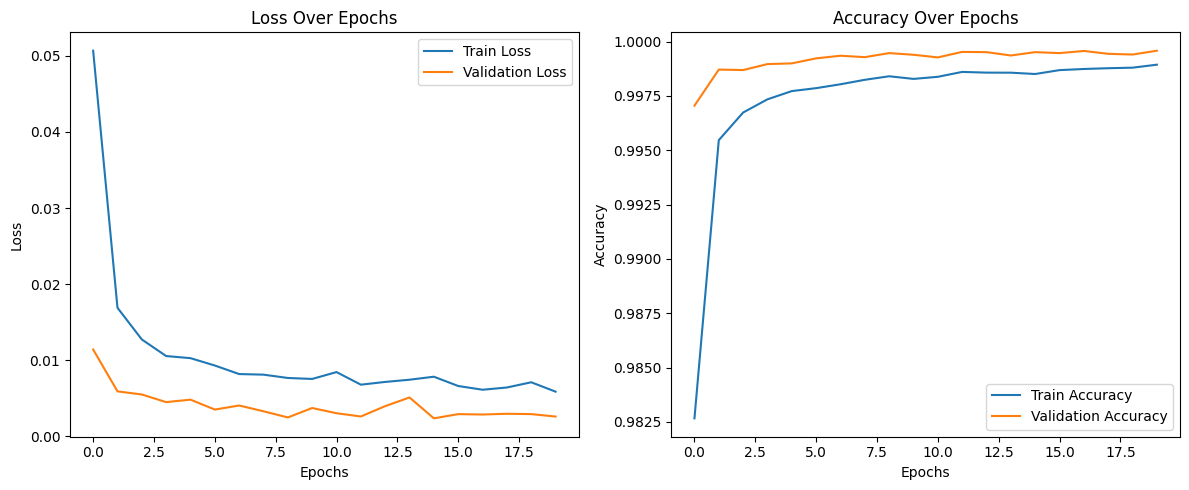

In [20]:
# Plot training history
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## **Key Takeaways**
- The baseline Logistic Regression model provided a reliable benchmark but struggled with fraud detection due to class imbalance.
- The MLP model significantly improved recall and overall fraud detection performance.
- Handling class imbalance and scaling features were critical to achieving high accuracy and reliability.
---

---





## **Streamlit Application**

### **Objective**
Create an interactive Streamlit application to showcase the project, allowing users to explore the dataset, view analysis results, and evaluate machine learning models.





## **Application Features**

### **1. Introduction**
- **Purpose**: Provide an overview of the dataset and project objectives.
- **Details**:
  - Dataset contains 284,807 transactions, with only 492 labeled as fraud.
  - Focus on using machine learning to identify fraudulent transactions.
  - Steps include EDA, data preprocessing, and training an MLP model.

---

### **2. Exploratory Data Analysis (EDA)**
- **Purpose**: Enable users to explore the dataset and understand key insights.
- **Features**:
  - **Dataset Overview**: Displays the first few rows and summary statistics.
  - **Class Distribution**: Visualizes the imbalance between fraud and non-fraud cases.
  - **Transaction Amount Distribution**: Shows the spread of transaction amounts.
- **Outcome**:
  - Users gain a comprehensive understanding of the dataset's structure and trends.

---

### **3. Machine Learning Model**
- **Purpose**: Showcase model training, predictions, and evaluation results.
- **Features**:
  - **Preprocessing**: Automatically scales and splits the dataset.
  - **Training**: Builds and trains an MLP model using the preprocessed data.
  - **Evaluation**:
    - Displays a detailed classification report.
    - Precision-Recall Curve visualizes the model’s performance, focusing on the minority class.
- **Outcome**:
  - Highlights the effectiveness of the MLP model in detecting fraud.

---

### **4. Conclusion**
- **Purpose**: Summarize the findings and emphasize key takeaways.
- **Details**:
  - The MLP model performed well in identifying fraudulent transactions.
  - Handling class imbalance and evaluating using AUPRC is critical for imbalanced datasets.

---

## **How to Use the Application**

1. **Install Streamlit**:
   - Run `pip install streamlit` to install the required package.

2. **Run the Application**:
   - Save the code in a file named `app.py`.
   - Execute the app using the command:
     ```bash
     streamlit run app.py
     ```

3. **Explore the Features**:
   - Use the sidebar to navigate through sections:
     - **Introduction**: Learn about the dataset and project objectives.
     - **EDA**: View visualizations and summary statistics.
     - **Model**: Train and evaluate the MLP model.
     - **Conclusion**: Review project outcomes.

---


In [21]:
# import streamlit as st
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, precision_recall_curve, auc
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.optimizers import Adam

# # Load dataset
# @st.cache
# def load_data():
#     return pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

# data = load_data()

# # Sidebar options
# st.sidebar.title("Credit Card Fraud Detection")
# option = st.sidebar.radio("Navigate the App:", ["Introduction", "EDA", "Model Training", "Transaction Prediction", "Conclusion"])

# if option == "Introduction":
#     st.title("Credit Card Fraud Detection")
#     st.markdown("""
#     - **Dataset**: 284,807 transactions with only 492 labeled as fraud.
#     - **Objective**: Detect fraudulent transactions using machine learning.
#     - **Features of the App**:
#         1. Explore the dataset with interactive visualizations.
#         2. Train and evaluate a Multi-Layer Perceptron (MLP) model.
#         3. Predict fraud for custom transaction inputs.
#     """)

# elif option == "EDA":
#     st.title("Exploratory Data Analysis")
#     st.write("### Dataset Overview")
#     st.dataframe(data.head())
#     st.write("### Summary Statistics")
#     st.write(data.describe())

#     st.write("### Class Distribution")
#     fig, ax = plt.subplots()
#     sns.countplot(x='Class', data=data, palette='Set1', ax=ax)
#     st.pyplot(fig)

#     st.write("### Transaction Amount Distribution")
#     fig, ax = plt.subplots()
#     sns.histplot(data['Amount'], bins=50, kde=True, color='blue', ax=ax)
#     st.pyplot(fig)

# elif option == "Model Training":
#     st.title("Machine Learning Model Training")

#     st.write("### Data Preprocessing")
#     # Preprocessing
#     X = data.drop(columns=['Class'])
#     y = data['Class']
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)
#     X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
#     st.write(f"Training Data Shape: {X_train.shape}")
#     st.write(f"Testing Data Shape: {X_test.shape}")

#     st.write("### Build and Train MLP Model")
#     model = Sequential([
#         Dense(128, input_dim=X_train.shape[1], activation='relu'),
#         Dropout(0.3),
#         Dense(64, activation='relu'),
#         Dropout(0.3),
#         Dense(1, activation='sigmoid')
#     ])
#     model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#     with st.spinner('Training the model...'):
#         model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, verbose=0)
#     st.success("Model Training Completed!")

#     st.write("### Model Evaluation")
#     y_pred = (model.predict(X_test) > 0.5).astype(int)
#     report = classification_report(y_test, y_pred, output_dict=True)
#     st.json(report)

#     precision, recall, thresholds = precision_recall_curve(y_test, model.predict(X_test))
#     auc_pr = auc(recall, precision)
#     st.write(f"Area Under Precision-Recall Curve: {auc_pr:.4f}")
#     fig, ax = plt.subplots()
#     ax.plot(recall, precision, label=f'AUPRC = {auc_pr:.4f}')
#     ax.set_xlabel('Recall')
#     ax.set_ylabel('Precision')
#     ax.legend()
#     st.pyplot(fig)

# elif option == "Transaction Prediction":
#     st.title("Transaction Prediction")

#     st.write("### Input Transaction Details")
#     user_input = {}
#     for col in data.columns[:-1]:  # Exclude 'Class'
#         user_input[col] = st.number_input(f"{col}", value=0.0)

#     st.write("### Predict Fraud")
#     input_data = pd.DataFrame([user_input])
#     scaled_input = scaler.transform(input_data)
#     prediction = model.predict(scaled_input)
#     fraud_probability = prediction[0][0]
#     st.write(f"Fraud Probability: {fraud_probability:.2f}")
#     if fraud_probability > 0.5:
#         st.error("This transaction is likely fraudulent!")
#     else:
#         st.success("This transaction is likely legitimate.")

# elif option == "Conclusion":
#     st.title("Conclusion")
#     st.markdown("""
#     - The MLP model performs well in detecting fraudulent transactions, achieving a high AUPRC.
#     - Imbalanced datasets require careful handling to ensure model effectiveness.
#     - Real-world applications can benefit from deploying this model in production systems.
#     - Future work can include hyperparameter tuning and testing additional algorithms.
#     """)


---